Implimentattion of Kmeans

1.Objective of the Project: This project is to design to use the impliment and determine the accuracy Custom-kmeans(it is kmeans only to determine defined with traditional mathods without the help of any library).


2.To properly test our code and its accuracy i am comparing the results of 3 data sets "White wine" , "Raisin" and " Dry beans" and Using silhouette index and confusion matrix the scores of custom kmeans are compared with results of the Kmeans using sikit learn.

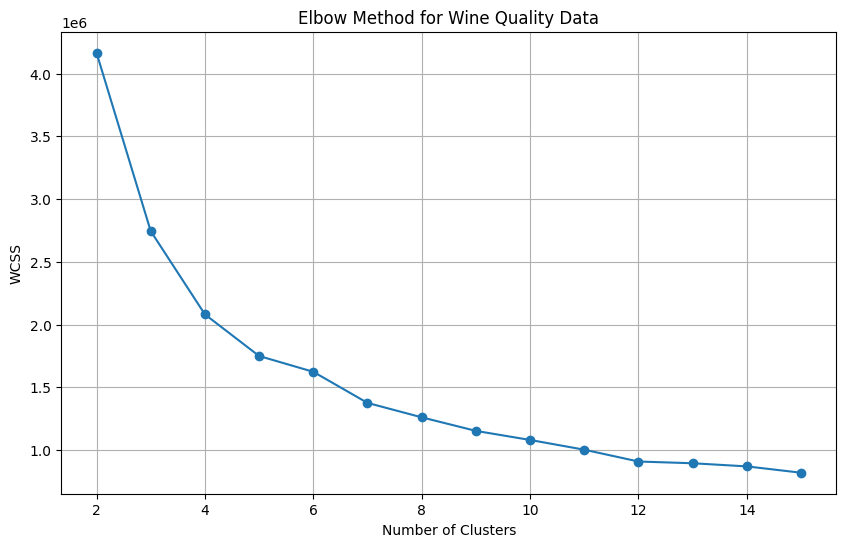

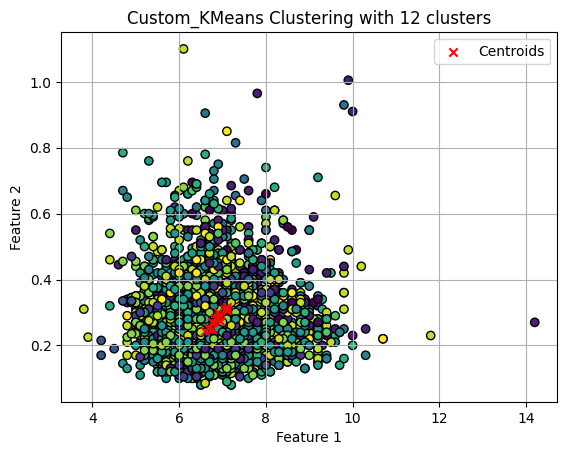

Number of centroids: 12


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests

# Define the CustomKMeans class
class CustomKMeans:
    def __init__(self, n_clusters, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter

    def fit(self, X):
        # Initialize centroids randomly
        self.centroids = self._initialize_centroids(X)

        for _ in range(self.max_iter):
            # Assign each data point to the nearest centroid
            labels = self._assign_clusters(X)

            # Update centroids based on the mean of data points in each cluster
            new_centroids = self._update_centroids(X, labels)

            # Check for convergence
            if np.allclose(self.centroids, new_centroids):
                break

            self.centroids = new_centroids

        return labels

    def _initialize_centroids(self, X):
        return X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]

    def _assign_clusters(self, X):
        distances = np.sqrt(np.sum((X[:, np.newaxis] - self.centroids) ** 2, axis=2))
        return np.argmin(distances, axis=1)

    def _update_centroids(self, X, labels):
        new_centroids = np.zeros_like(self.centroids)

        for i in range(self.n_clusters):
            cluster_points = X[labels == i]
            if len(cluster_points) > 0:
                new_centroids[i] = np.mean(cluster_points, axis=0)
            else:
                new_centroids[i] = X[np.random.choice(len(X))]

        return new_centroids

    def compute_wcss(self, X, labels):
        wcss = 0
        for i in range(self.n_clusters):
            cluster_points = X[labels == i]
            if len(cluster_points) > 0:
                wcss += np.sum((cluster_points - self.centroids[i]) ** 2)
        return wcss

# Read the data
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
response = requests.get(url)
data_whitewine = pd.read_csv(url, delimiter=';')
# Remove the 12th column
data_whitewine.drop(columns=[data_whitewine.columns[11]], inplace=True)

# Convert dataframe to numpy array
X = data_whitewine.values

# Maximum number of clusters
max_clusters = 15

# Perform dynamic k-means clustering and compute WCSS for each number of clusters
wcss_values = []
for n_clusters in range(2, max_clusters + 1):
    custom_kmeans = CustomKMeans(n_clusters=n_clusters)
    labels = custom_kmeans.fit(X)
    wcss_values.append(custom_kmeans.compute_wcss(X, labels))

# Plot Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(2, max_clusters + 1), wcss_values, marker='o')
plt.title('Elbow Method for Wine Quality Data')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# Perform dynamic k-means clustering for 12 clusters
n_clusters = 12
custom_kmeans = CustomKMeans(n_clusters=n_clusters)
labels = custom_kmeans.fit(X)

# Plot clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', edgecolors='k')
plt.scatter(custom_kmeans.centroids[:, 0], custom_kmeans.centroids[:, 1], marker='x', color='red', label='Centroids')
plt.title('Custom_KMeans Clustering with 12 clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

# Number of centroids
print("Number of centroids:", len(custom_kmeans.centroids))


In [2]:
# Calculate silhouette score
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.2976286890457628


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

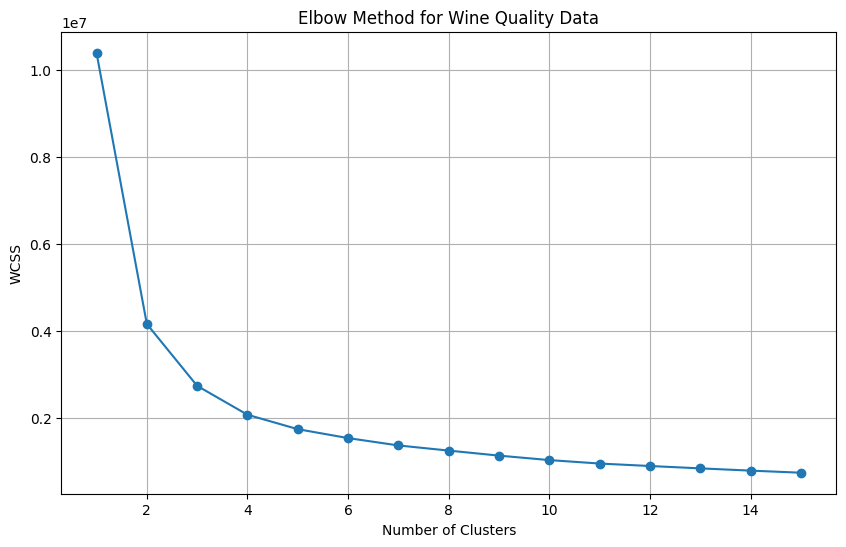

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


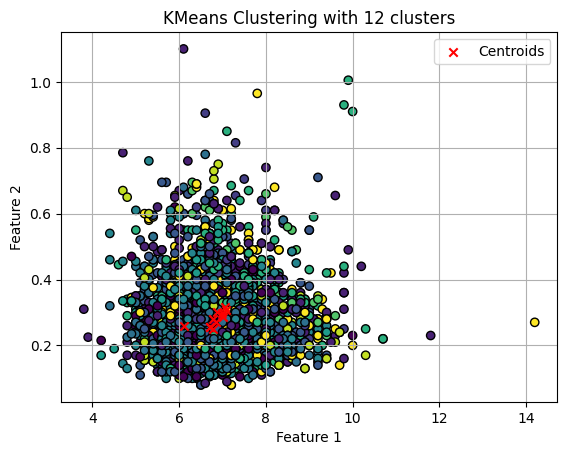

Silhouette Score: 0.29302032330526673


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Read the data
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
data_whitewine = pd.read_csv(url, delimiter=';')
# Remove the 12th column
data_whitewine.drop(columns=[data_whitewine.columns[11]], inplace=True)

# Convert dataframe to numpy array
X = data_whitewine.values

# Maximum number of clusters
max_clusters = 15

# Calculate WCSS for each number of clusters
wcss = []
for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), wcss, marker='o')
plt.title('Elbow Method for Wine Quality Data')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# Fit KMeans with optimal number of clusters
optimal_clusters = 12
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(X)

# Get cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Plot clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', edgecolors='k')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red', label='Centroids')
plt.title('KMeans Clustering with {} clusters'.format(optimal_clusters))
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

# Calculate silhouette score
silhouette_avg = silhouette_score(X, labels)
print("Silhouette Score:", silhouette_avg)


CUSTOME K MEANS PERORMED ON ANOTHER DATA SET


In [4]:
!pip3 install -U ucimlrepo


In [5]:
from ucimlrepo import fetch_ucirepo, list_available_datasets
import ucimlrepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pprint

In [6]:
# check which datasets can be imported
list_available_datasets()
list_available_datasets(search='Raisin')


-------------------------------------
The following datasets are available:
-------------------------------------
Dataset Name                                                                            ID    
------------                                                                            --    
Abalone                                                                                 1     
Adult                                                                                   2     
Annealing                                                                               3     
Audiology (Standardized)                                                                8     
Auto MPG                                                                                9     
Automobile                                                                              10    
Balance Scale                                                                           12    
Balloons                       

In [7]:
Raisin = fetch_ucirepo(id=850)
Raisin.data.original
# Load the original data into a DataFrame
raisin_df = Raisin.data.original
print("Original DataFrame:")
print(raisin_df.head())
# Display the names of all columns
print("Column names in the DataFrame:")
print(raisin_df.columns)
raisin_df.shape

Original DataFrame:
    Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0  87524       442.246011       253.291155      0.819738       90546   
1  75166       406.690687       243.032436      0.801805       78789   
2  90856       442.267048       266.328318      0.798354       93717   
3  45928       286.540559       208.760042      0.684989       47336   
4  79408       352.190770       290.827533      0.564011       81463   

     Extent  Perimeter    Class  
0  0.758651   1184.040  Kecimen  
1  0.684130   1121.786  Kecimen  
2  0.637613   1208.575  Kecimen  
3  0.699599    844.162  Kecimen  
4  0.792772   1073.251  Kecimen  
Column names in the DataFrame:
Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'Extent', 'Perimeter', 'Class'],
      dtype='object')


(900, 8)

In [8]:
# checking the distribution of Target Varibale
raisin_df['Class'].value_counts()

raisin_df['Class']=raisin_df['Class'].apply(lambda x: 1 if x== 'Kecimen' else 0)
A=raisin_df
A

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,1
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,1
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,1
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,1
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,1
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,0
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,0
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,0
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,0


In [9]:
# Define the CustomKMeans class
class CustomKMeans:
    def __init__(self, n_clusters, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter

    def fit(self, X):
        # Initialize centroids randomly
        self.centroids = self._initialize_centroids(X)

        for _ in range(self.max_iter):
            # Assign each data point to the nearest centroid
            labels = self._assign_clusters(X)

            # Update centroids based on the mean of data points in each cluster
            new_centroids = self._update_centroids(X, labels)

            # Check for convergence
            if np.allclose(self.centroids, new_centroids):
                break

            self.centroids = new_centroids

        return labels

    def _initialize_centroids(self, X):
        return X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]

    def _assign_clusters(self, X):
        distances = np.sqrt(np.sum((X[:, np.newaxis] - self.centroids) ** 2, axis=2))
        return np.argmin(distances, axis=1)

    def _update_centroids(self, X, labels):
        new_centroids = np.zeros_like(self.centroids)

        for i in range(self.n_clusters):
            cluster_points = X[labels == i]
            if len(cluster_points) > 0:
                new_centroids[i] = np.mean(cluster_points, axis=0)
            else:
                new_centroids[i] = X[np.random.choice(len(X))]

        return new_centroids

    def compute_wcss(self, X, labels):
        wcss = 0
        for i in range(self.n_clusters):
            cluster_points = X[labels == i]
            if len(cluster_points) > 0:
                wcss += np.sum((cluster_points - self.centroids[i]) ** 2)
        return wcss
# Perform dynamic k-means clustering for 12 clusters
n_clusters = 2
custom_kmeans = CustomKMeans(n_clusters=n_clusters)
labels = custom_kmeans.fit(A.values)


In [10]:
# Add cluster column to DataFrame B
A['Cluster'] = labels


In [11]:
A

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class,Cluster
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,1,1
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,1,1
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,1,1
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,1,1
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,1,1
...,...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,0,1
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,0,1
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,0,1
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,0,1


[1 0]
[1 0]


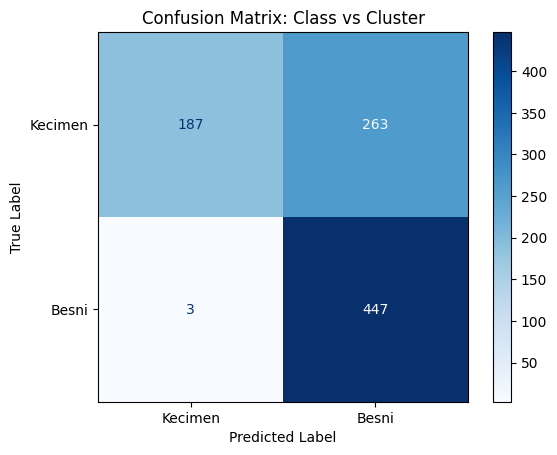

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming A is your DataFrame and it contains 'Class' and 'Cluster' columns

# Ensure 'Class' and 'Cluster' contain the expected values (0 and 1)
print(A['Class'].unique())
print(A['Cluster'].unique())

# Create confusion matrix
conf_matrix = confusion_matrix(A['Class'], A['Cluster'])

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Kecimen', 'Besni'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: Class vs Cluster')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Applying Kmeans

In [13]:
from ucimlrepo import fetch_ucirepo, list_available_datasets
import ucimlrepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pprint

Raisin = fetch_ucirepo(id=850)
Raisin.data.original
# Load the original data into a DataFrame
raisin_df = Raisin.data.original
print("Original DataFrame:")
print(raisin_df.head())
# Display the names of all columns
print("Column names in the DataFrame:")
print(raisin_df.columns)
raisin_df.shape

Original DataFrame:
    Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0  87524       442.246011       253.291155      0.819738       90546   
1  75166       406.690687       243.032436      0.801805       78789   
2  90856       442.267048       266.328318      0.798354       93717   
3  45928       286.540559       208.760042      0.684989       47336   
4  79408       352.190770       290.827533      0.564011       81463   

     Extent  Perimeter    Class  
0  0.758651   1184.040  Kecimen  
1  0.684130   1121.786  Kecimen  
2  0.637613   1208.575  Kecimen  
3  0.699599    844.162  Kecimen  
4  0.792772   1073.251  Kecimen  
Column names in the DataFrame:
Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'Extent', 'Perimeter', 'Class'],
      dtype='object')


(900, 8)

In [14]:
raisin_df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,Besni


In [15]:
from sklearn.cluster  import KMeans
B=raisin_df
B['Class'] = B['Class'].map({'Kecimen':1 ,'Besni':0})


In [16]:
B

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,1
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,1
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,1
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,1
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,1
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,0
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,0
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,0
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,0


     Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
10  80437       449.454581       232.325506      0.856043       84460   
11  43725       301.322218       186.950629      0.784258       45021   
12  43441       276.610829       201.813135      0.683882       45133   
13  76792       338.857545       291.359202      0.510584       78842   
14  74167       387.798931       247.858123      0.769090       76807   
15  33565       261.554331       167.708491      0.767374       35794   
16  64670       403.083975       206.484644      0.858829       66419   
17  64762       354.293940       235.752463      0.746474       66713   
18  43295       304.284467       182.811037      0.799407       44714   
19  70699       418.698572       216.596054      0.855799       72363   

      Extent  Perimeter  Class  Cluster  
10  0.674236   1176.305      1        1  
11  0.697068    818.873      1        1  
12  0.690856    803.748      1        1  
13  0.772322   1042.770     

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


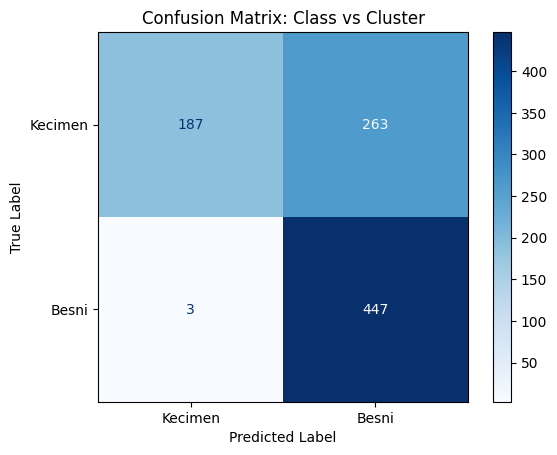

In [17]:
# Apply KMeans algorithm
# Convert dataframe to numpy array excluding the 'Class' column for clustering
S = B.drop(columns=['Class']).values
kmeans = KMeans(n_clusters=2, random_state=0)
labels = kmeans.fit_predict(S)

# Add cluster labels to DataFrame B
B['Cluster'] = labels

# Print first 10-20 rows to see the result
print(B.iloc[10:20])

# Create confusion matrix
conf_matrix = confusion_matrix(B['Class'], B['Cluster'])

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Kecimen', 'Besni'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: Class vs Cluster')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Experimentation on data set 3


In [18]:
from ucimlrepo import fetch_ucirepo, list_available_datasets
import ucimlrepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pprint
list_available_datasets(search='Dry')

------------------------------------------------------------
The following datasets are available for search query "dry":
------------------------------------------------------------
Dataset Name    ID    
------------    --    
Dry Bean        602   



Fetching and transfoeeming the data

In [19]:
Dry_Beans=fetch_ucirepo(id=602)
dx=Dry_Beans.data.original
print(dx)
dx.groupby('Class').size()


        Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRatio  \
0      28395    610.291       208.178117       173.888747     1.197191   
1      28734    638.018       200.524796       182.734419     1.097356   
2      29380    624.110       212.826130       175.931143     1.209713   
3      30008    645.884       210.557999       182.516516     1.153638   
4      30140    620.134       201.847882       190.279279     1.060798   
...      ...        ...              ...              ...          ...   
13606  42097    759.696       288.721612       185.944705     1.552728   
13607  42101    757.499       281.576392       190.713136     1.476439   
13608  42139    759.321       281.539928       191.187979     1.472582   
13609  42147    763.779       283.382636       190.275731     1.489326   
13610  42159    772.237       295.142741       182.204716     1.619841   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  Roundness  \
0          0.549812       2871

Class
BARBUNYA    1322
BOMBAY       522
CALI        1630
DERMASON    3546
HOROZ       1928
SEKER       2027
SIRA        2636
dtype: int64

Drooping the Class colomn


In [20]:
dx['Class'] = dx['Class'].map({'BARBUNYA': 1, 'BOMBAY': 2, 'CALI': 3, 'DERMASON': 4, 'HOROZ': 5, 'SEKER': 6, 'SIRA': 7})


In [21]:
D=dx.iloc[:,0:16]
D

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222


In [22]:
# Define the CustomKMeans class
class CustomKMeans:
    def __init__(self, n_clusters, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter

    def fit(self, X):
        # Initialize centroids randomly
        self.centroids = self._initialize_centroids(X)

        for _ in range(self.max_iter):
            # Assign each data point to the nearest centroid
            labels = self._assign_clusters(X)

            # Update centroids based on the mean of data points in each cluster
            new_centroids = self._update_centroids(X, labels)

            # Check for convergence
            if np.allclose(self.centroids, new_centroids):
                break

            self.centroids = new_centroids

        return labels

    def _initialize_centroids(self, X):
        return X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]

    def _assign_clusters(self, X):
        distances = np.sqrt(np.sum((X[:, np.newaxis] - self.centroids) ** 2, axis=2))
        return np.argmin(distances, axis=1)

    def _update_centroids(self, X, labels):
        new_centroids = np.zeros_like(self.centroids)

        for i in range(self.n_clusters):
            cluster_points = X[labels == i]
            if len(cluster_points) > 0:
                new_centroids[i] = np.mean(cluster_points, axis=0)
            else:
                new_centroids[i] = X[np.random.choice(len(X))]

        return new_centroids

    def compute_wcss(self, X, labels):
        wcss = 0
        for i in range(self.n_clusters):
            cluster_points = X[labels == i]
            if len(cluster_points) > 0:
                wcss += np.sum((cluster_points - self.centroids[i]) ** 2)
        return wcss
# Perform dynamic k-means clustering for 12 clusters
n_clusters = 7
custom_kmeans = CustomKMeans(n_clusters=n_clusters)
labels = custom_kmeans.fit(D.values)


In [23]:
D['Cluster']=labels
D

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Cluster
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,0
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,0
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,0
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,0
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,5
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,5
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,5
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,5


In [24]:
# Assuming dx and d are your DataFrames
# Extract 'Class' column from dx and 'Cluster' column from d
class_column = dx['Class']
cluster_column = D['Cluster']

# Create a new DataFrame
new_df=pd.DataFrame({'Class':class_column,'Cluster':cluster_column})
new_df

,Class,Cluster
0,6,0
1,6,0
2,6,0
3,6,0
4,6,0
...,...,...
13606,4,5
13607,4,5
13608,4,5
13609,4,5


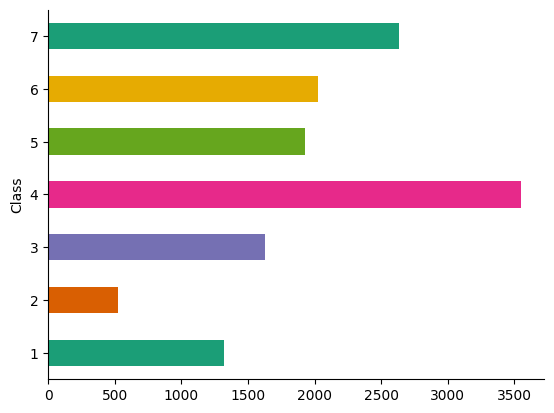

In [25]:
from matplotlib import pyplot as plt
import seaborn as sns
new_df.groupby('Class').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

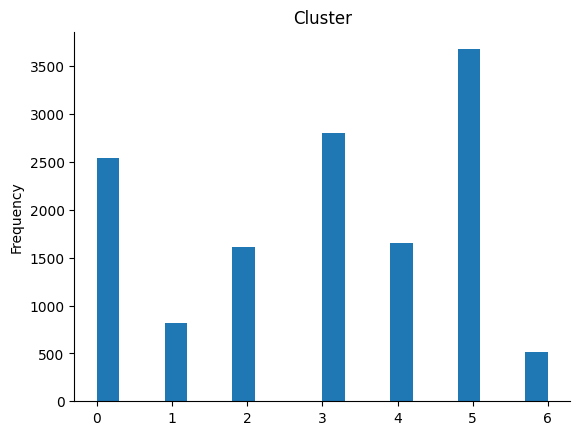

In [26]:
from matplotlib import pyplot as plt
new_df['Cluster'].plot(kind='hist', bins=20, title='Cluster')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Extract 'Class' and 'Cluster' columns
true_labels = new_df['Class']
predicted_labels = new_df['Cluster']

# Create confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Calculate accuracy score
accuracy = accuracy_score(true_labels, predicted_labels)

print("Confusion Matrix:")
print(conf_matrix)
print("Accuracy Score:", accuracy)


Confusion Matrix:
[[   0    0    0    0    0    0    0    0]
 [   0  258  347   64  650    3    0    0]
 [   0    6    0    0    0    0  516    0]
 [   0  552  174    8  896    0    0    0]
 [2331    0    0    0    0 1215    0    0]
 [  10    1  959  709  106  143    0    0]
 [ 179    0   29  445    0 1374    0    0]
 [  18    0  102 1574    0  942    0    0]]
Accuracy Score: 0.030049224891631768


Emplotying kmeans on Dry beans

In [28]:
from ucimlrepo import fetch_ucirepo, list_available_datasets
import ucimlrepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pprint
list_available_datasets(search='Dry')
Beans=fetch_ucirepo(id=602)
bx=Beans.data.original
print(bx)
bx.groupby('Class').size()
bx['Class'] = bx['Class'].map({'BARBUNYA': 1, 'BOMBAY': 2, 'CALI': 3, 'DERMASON': 4, 'HOROZ': 5, 'SEKER': 6, 'SIRA': 7})
beans=bx.iloc[:,0:16]
beans

# Apply KMeans algorithm
# Convert dataframe to numpy array excluding the 'Class' column for clustering

kmeans = KMeans(n_clusters=7, random_state=0)
labels = kmeans.fit_predict(beans)
# Assuming dx and d are your DataFrames

beans['Cluster']=labels
# Extract 'Class' column from dx and 'Cluster' column from d
class_column1 = bx['Class']
cluster_column1 = beans['Cluster']

# Create a new DataFrame
new_df1=pd.DataFrame({'Class':class_column1,'Cluster':cluster_column1})
new_df1

from sklearn.metrics import confusion_matrix, accuracy_score

# Extract 'Class' and 'Cluster' columns
true_labels = new_df1['Class']
predicted_labels = new_df1['Cluster']

# Create confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Calculate accuracy score
accuracy = accuracy_score(true_labels, predicted_labels)

print("Confusion Matrix:")
print(conf_matrix)
print("Accuracy Score:", accuracy)

------------------------------------------------------------
The following datasets are available for search query "dry":
------------------------------------------------------------
Dataset Name    ID    
------------    --    
Dry Bean        602   

        Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRatio  \
0      28395    610.291       208.178117       173.888747     1.197191   
1      28734    638.018       200.524796       182.734419     1.097356   
2      29380    624.110       212.826130       175.931143     1.209713   
3      30008    645.884       210.557999       182.516516     1.153638   
4      30140    620.134       201.847882       190.279279     1.060798   
...      ...        ...              ...              ...          ...   
13606  42097    759.696       288.721612       185.944705     1.552728   
13607  42101    757.499       281.576392       190.713136     1.476439   
13608  42139    759.321       281.539928       191.187979     1.472582   
13609  

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Confusion Matrix:
[[   0    0    0    0    0    0    0    0]
 [  16    0  339    0  230  737    0    0]
 [   0  217    2    0    0    0  303    0]
 [   2    0  699    0   69  860    0    0]
 [ 731    0    0 2815    0    0    0    0]
 [ 324    0    1   24 1286  293    0    0]
 [1375    0    0  504  147    1    0    0]
 [1841    0    0   74  720    1    0    0]]
Accuracy Score: 0.021673646315480126


Conclusion

COMPARISON

DATA-SET 1 WINE_WHITE_QUALITY

Using the Data set wcss mathod Both the mathods have produced approximatimatly same result and we were able to find 12 clusters as optimal number of clusters


Silhouette Score using Custom kmeans for 12 clusters -  0.2976286890457628

Silhouette Score using kmeans for 12 clusters - 0.29302032330526673


From the comparison itself it can be predicted custome kmeans is performing slightly better than the kmeans for the first data set.



DATA-SET-2-"RAISINS"

In the raisins data set the accuracy is checked Using confusion matrix. The comparison is done using class attribute of the dataset. Where two type raisine are categorised based on other attributes such as "Area"	"MajorAxisLength"	"MinorAxisLength"	"Eccentricity"	"ConvexArea"	"Extent"	"Perimeter"


Custome kmeans = Kecimen      Besni

          Kecimen 187         263

          Besni   3           447


 kmeans         = Kecimen      Besni

          Kecimen 187         263

          Besni   3           447

 both models produced exacly same results

Data set 3- "Dry_Beans"   

DATA sets are tested against the Class attributes of the dry beans. In the Data set there are total seven kinds of clases 'types" of dry beans , our model specificals clusters the dtat set nased on the attributes other than class into 7 clusters. The accuracies of the results are checked on the basis of the confusion matrix

custom kmean Accuracy Score: 0.030049224891631768

kmeans Accuracy Score: 0.021673646315480126

From Above results we can see that custome k means has performed ar beeter thann kmeans


